# Центральная предельная теорема своими руками

Будем рассматривать распределение $\chi ^{2}$(хи-квадрат) с $k$ степенями свободы.
Функция плотности вероятности имеет вид: $\frac{(1/2)^{k/2}}{\Gamma (k/2)}x^{k/2-1}e^{-x/2}$

In [4]:
# импортируем необходимые библиотеки

import numpy as np
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

Text(0, 0.5, 'Probability')

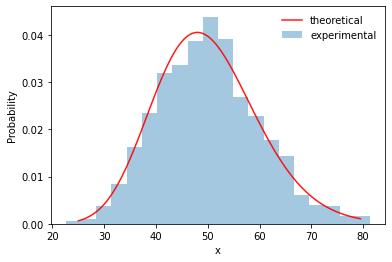

In [18]:
k = 50 # количество степеней свободы

# генерируем выборку из 1000 элементов и строим гистограмму
r = chi2.rvs(k, size=1000)
plt.hist(r, 20, density=True, histtype='stepfilled', alpha=0.4, label='experimental')

# теперь стороим теоретическую функцию плотности вероятности на том же графике
x = np.arange(25.,80.,0.5)
plt.plot(x, chi2.pdf(x, k), 'r', alpha=0.9, label='theoretical')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('Probability')

Как и ожидалось, построенная гистограмма удовлетворительно совпадает с графиком плотности вероятности нашего распределения. 

In [22]:
# подготовим массивы выборочных средних для выборок объёма <b>n</b>, по 100 выборок каждого объёма
sizes = [5, 10, 50]
samples = []
bins = np.arange(35.,65.,0.5)
for size in sizes:
    for _ in itertools.repeat(None, 1000):
        rv = chi2.rvs(k, size=size)
        samples.append(np.mean(rv))

По свойствам распределения хи-квадрат, матожидание равняется $EX=k$,а дисперсия $DX=2k$.

У нас $k=50$, поэтому $EX=50$ и $DX=100$.

В scipy.stats.norm распределение задается через $\mu$ и $\sigma$, поэтому мы находим
$\sqrt{DX/n}$, где n - размер выборки.

Text(0, 0.5, 'Probability')

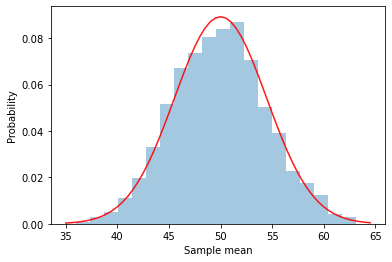

In [23]:
# построим гистограмму и график нормального распределения для выборки размера 5
plt.hist(samples[0:1000], 20, density=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, k, np.sqrt(2*k/5.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

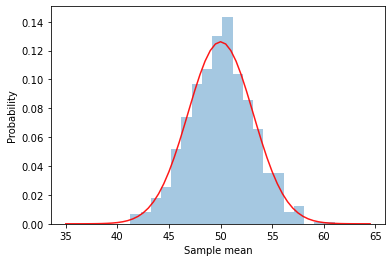

In [26]:
# проделаем то же для выборки размера 10
plt.hist(samples[1000:2000], 20, density=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, k, np.sqrt(2*k/10.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

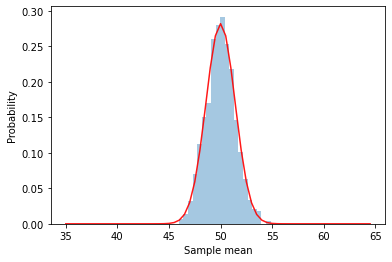

In [27]:
# то же для выборки размера 50
plt.hist(samples[2000:3000], 20, density=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, k, np.sqrt(2*k/50.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

Выводы: как видно из графиков, чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению.
Также стоит отметить, что с ростом n уменьшается дисперсия распределения выборочных средних.